##                    *Exploratory Data Analysis of HABERMAN's survival data set*

### Haberman's survival Data Set:

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* Number of Data Points: 306
* Number of Independant Variables: 3 (patient_age, operation_year, axillary_nodes)
* Number of Dependanet Variables: 1 (suvival_status)
* Objective: To analyse the survival status of cancer patients who have undergone surgery based on the given  three attributes.

#### References:

* Haberman's Survival Data Set: https://www.kaggle.com/gilsousa/habermans-survival-data-set
* Information on positive axillary nodes: https://www.medicalnewstoday.com/articles/319713.php

### Data Dictionary:

* **patient_age** : Age of patient at the the time of operation(numerical)
* **operation_year** : Patient's year of operation (year - 1900, numerical)
* **axillary_nodes** : Number of positive axillary nodes detected (numerical)
* **survival_status** : Survival status (class attribute) where 1 = the patient survived 5 years or longer, and 2 = the patient died within 5 years

### Data Preparation

In [20]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#hiding all the warnings
warnings.filterwarnings('ignore')
#Load Haberman's data set into a pandas DataFrame
col_names=['patient_age','operation_year','axillary_nodes','survival_status'] #assigning names for columns in our data set
patient_df=pd.read_csv('haberman.csv',names=col_names) #Read the CSV file into PandasDF


In [21]:
#Data points and attributes in our dataset
print(patient_df.shape)

(306, 4)


**Observation:** Number of data points is 306 and attributes is 4

In [22]:
#column names in our data set
print(patient_df.columns)

Index(['patient_age', 'operation_year', 'axillary_nodes', 'survival_status'], dtype='object')


In [23]:
#First few data points in our data set
print(patient_df.head())

   patient_age  operation_year  axillary_nodes  survival_status
0           30              64               1                1
1           30              62               3                1
2           30              65               0                1
3           31              59               2                1
4           31              65               4                1


In [24]:
#describe the dataset given
print(patient_df.describe())

       patient_age  operation_year  axillary_nodes  survival_status
count   306.000000      306.000000      306.000000       306.000000
mean     52.457516       62.852941        4.026144         1.264706
std      10.803452        3.249405        7.189654         0.441899
min      30.000000       58.000000        0.000000         1.000000
25%      44.000000       60.000000        0.000000         1.000000
50%      52.000000       63.000000        1.000000         1.000000
75%      60.750000       65.750000        4.000000         2.000000
max      83.000000       69.000000       52.000000         2.000000


In [25]:
# Data points for each class(survival_status) in our dataset
print(patient_df["survival_status"].value_counts())


1    225
2     81
Name: survival_status, dtype: int64


**Observation(s):** 
* Number of people survived 5 years or longer after surgery are 225
* Number of people who survived less then 5 years after surgery are 81
* This is an partially balanced dataset

In [26]:
#Classifying the date based on survival status
patient_survived=patient_df.loc[patient_df.survival_status==1]
patient_dead=patient_df.loc[patient_df.survival_status==2]
#describe the dataset given for patients survived and dead
print('  patients survived ')
print(patient_survived.describe())
print(' patients dead')
print(patient_dead.describe())

  patients survived 
       patient_age  operation_year  axillary_nodes  survival_status
count   225.000000      225.000000      225.000000            225.0
mean     52.017778       62.862222        2.791111              1.0
std      11.012154        3.222915        5.870318              0.0
min      30.000000       58.000000        0.000000              1.0
25%      43.000000       60.000000        0.000000              1.0
50%      52.000000       63.000000        0.000000              1.0
75%      60.000000       66.000000        3.000000              1.0
max      77.000000       69.000000       46.000000              1.0
 patients dead
       patient_age  operation_year  axillary_nodes  survival_status
count    81.000000       81.000000       81.000000             81.0
mean     53.679012       62.827160        7.456790              2.0
std      10.167137        3.342118        9.185654              0.0
min      34.000000       58.000000        0.000000              2.0
25%      46.

## Exploratory Data Analysis

###  1.Univariate Analysis:

### 1.1. Probabilty Density Function(PDF)

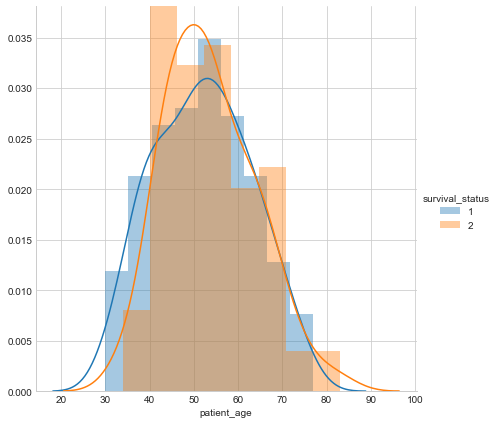

In [27]:
#Plotting PDF curve for patient_age attribute
sns.set_style('whitegrid')
sns.FacetGrid(patient_df,hue='survival_status',size=6).map(sns.distplot,'patient_age').add_legend()
plt.show()

**Observation(s):** 
* Patients with age less than 30 had  survived more >5 years.
* More patients had died <5 years between the age 45 to 50 and  after 78.

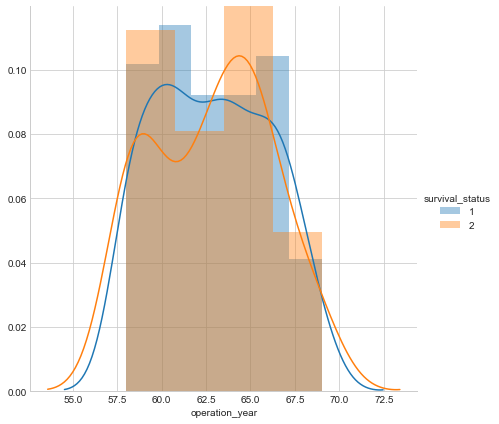

In [28]:
#Plotting PDF curve for operation_year attribute
sns.set_style('whitegrid')
sns.FacetGrid(patient_df,hue='survival_status',size=6).map(sns.distplot,'operation_year').add_legend()
plt.show()

**Observation:** 
* More patients had died <5 years between 1963 -1966.
* Between the years 1960 -1962,patients survived more >5 years is the highest among all other operation years.

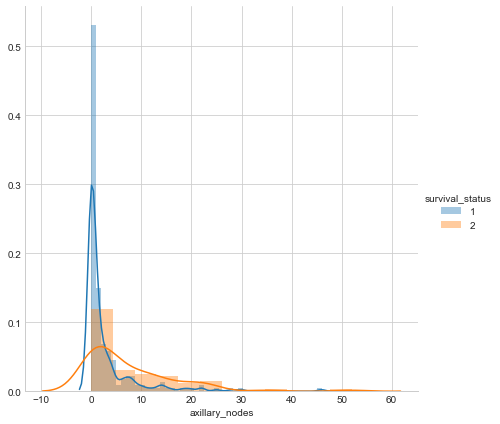

In [29]:
#Plotting PDF curve for axillary_nodes attribute
sns.set_style('whitegrid')
sns.FacetGrid(patient_df,hue='survival_status',size=6).map(sns.distplot,'axillary_nodes').add_legend()
plt.show()

**Observation:**
* Patients with positive axillary nodes more than 30 had died  <5 years.
* Even patients with negative axillary nodes had died <5 years.
*  Majoriy of Patients with axillary nodes in range -2 to 2 had survived >5 years


### 1.2. Cumulative Distribution Function(CDF)

For patients survived [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
For patients dead [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


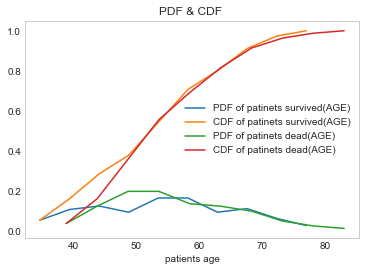

In [30]:
#Plotting PDF,CDF of patient_age of patients survived
counts,bin_edges=np.histogram(patient_survived.patient_age,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('For patients survived',pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="PDF of patinets survived(AGE)")
plt.plot(bin_edges[1:],cdf,label="CDF of patinets survived(AGE)")

#Plotting PDF,CDF of patient_age of patients dead
counts,bin_edges=np.histogram(patient_dead.patient_age,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('For patients dead',pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="PDF of patinets dead(AGE)")
plt.plot(bin_edges[1:],cdf,label="CDF of patinets dead(AGE)")
plt.legend()
plt.grid()
plt.title('PDF & CDF ')
plt.xlabel('patients age')
plt.show()

**Observation:**
* Patients below the age of 30 had survived > 5years.
* Patients above the age of 76 had survived < 5 years.


For patients survived [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
For patients dead [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


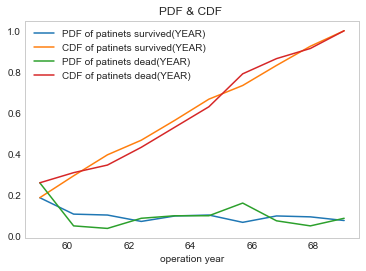

In [31]:
#Plotting PDF,CDF of operation year of patients survived
counts,bin_edges=np.histogram(patient_survived.operation_year,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('For patients survived',pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="PDF of patinets survived(YEAR)")
plt.plot(bin_edges[1:],cdf,label="CDF of patinets survived(YEAR)")

#Plotting PDF,CDF of patient_age of patients dead
counts,bin_edges=np.histogram(patient_dead.operation_year,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('For patients dead',pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="PDF of patinets dead(YEAR)")
plt.plot(bin_edges[1:],cdf,label="CDF of patinets dead(YEAR)")
plt.legend()
plt.grid()
plt.title('PDF & CDF ')
plt.xlabel('operation year')
plt.show()

**Observation:**
* 80% of the patients who survived < 5years had died before 1966.
* We can oberseve an almost linear relationship between the curves here.


For patients survived [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
For patients dead [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


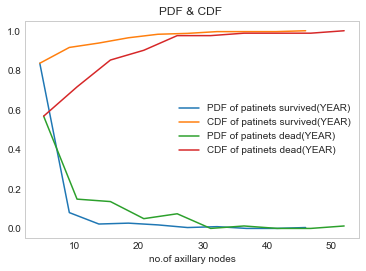

In [32]:
#Plotting PDF,CDF of axillary nodes of patients survived
counts,bin_edges=np.histogram(patient_survived.axillary_nodes,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('For patients survived',pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="PDF of patinets survived(YEAR)")
plt.plot(bin_edges[1:],cdf,label="CDF of patinets survived(YEAR)")

#Plotting PDF,CDF of patient_age of patients dead
counts,bin_edges=np.histogram(patient_dead.axillary_nodes,bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('For patients dead',pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label="PDF of patinets dead(YEAR)")
plt.plot(bin_edges[1:],cdf,label="CDF of patinets dead(YEAR)")
plt.legend()
plt.grid()
plt.title('PDF & CDF ')
plt.xlabel('no.of axillary nodes')
plt.show()

**Observation:**
* 85% of the paients who had survived >5 years had aillary nodes less than 2.
* 80 - 90% of the patients with axillary modes between 14 to 30 survived < 5 years.

### 1.3. Box plotting 

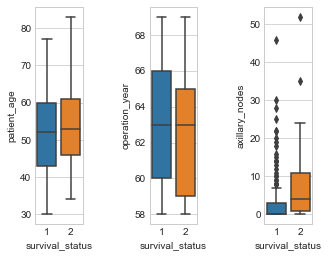

In [33]:
#Box Plot using patients age.
plt.figure(1)
plt.subplot(161)
sns.boxplot(x='survival_status',y='patient_age',data=patient_df)

#Box Plot using Patients operation year.
plt.subplot(163)
sns.boxplot(x='survival_status',y='operation_year',data=patient_df)

#Box Plot using no. of positive axillary nodes.
plt.subplot(165)
sns.boxplot(x='survival_status',y='axillary_nodes',data=patient_df)
plt.show()

**Observation:**
*From Fig1:*
* All the Patients between the age 30-35 had survived >5 years.
* All Patients aged more than 78 had not suvived >5 years.
* 50% of the patients who survived > 5 years age between 42-60.
* 50% of the patients who didnt survive > 5 years age between 46-61.

*From Fig2:*
* 50 % of the patients survived > 5 years during the operation period of 1960-1966.
* 50 % of the patients survived <5 years during the operation period  of 1959-1965.

*From Fig3:*
* 75 % of the patients survived >5 years who had axillary nodes <2.



### 1.4. Violin plotting 

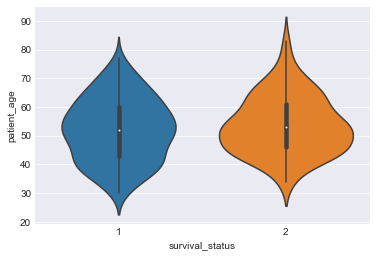

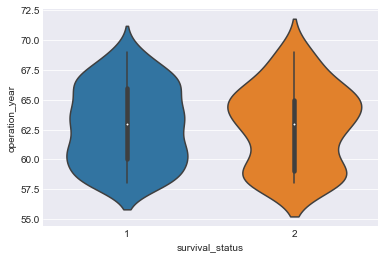

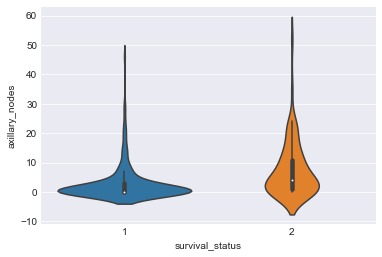

In [34]:
#Violin Plot using patients age.
sns.set_style('darkgrid')
sns.violinplot(x='survival_status',y='patient_age',data=patient_df)
plt.show()
#Violin Plot using Patients operation year.
sns.violinplot(x='survival_status',y='operation_year',data=patient_df)
plt.show()
#Violin Plot using no. of positive axillary nodes.
sns.violinplot(x='survival_status',y='axillary_nodes',data=patient_df)
plt.show()

**Observation:**
* 50 % of the people who died < 5 years are aged between 45-60.
* Patients above the age of 85 had not survived >5 years.
* 50% of the operaions happned between 1960-1966 had higher succes rate.
* 75% of the patients survied >5 years who had axillary nodes between -2 to 2.



###  2. Bi-variate Analysis:

### 2.1. 2D scatter plot

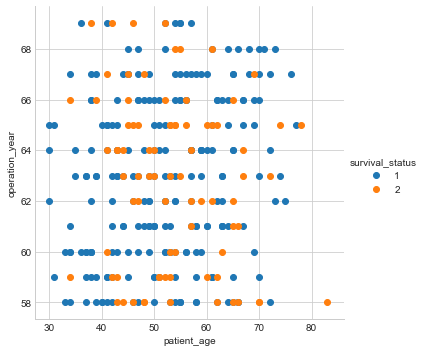

In [35]:
# 2D scatter plot with color coding for each of the class
sns.set_style('whitegrid')
sns.FacetGrid(patient_df,hue='survival_status',size=5).map(plt.scatter,'patient_age','operation_year').add_legend()
plt.show()

### 2.1. Pair Plots

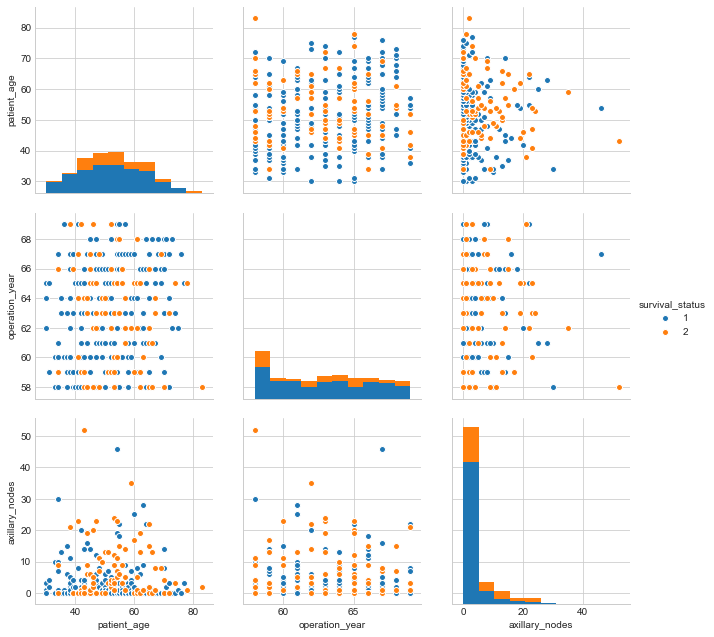

In [36]:
# pairwise scatter plot: Pair-Plot
sns.set_style("whitegrid")
sns.pairplot(patient_df,hue="survival_status",vars=['patient_age','operation_year','axillary_nodes'],size=3)
plt.show()

**Observation:**
* Patients below the age of 33 with irrespective of any number of aillary nodes survived >5 years.
* Patients above the age of 78 with irrespective of any number of aillary nodes survived <5 years.
* patient_age and axillary_nodes are the most useful feature for find the survival status of patients.

### 2.2.Multivariate probability density, contour plot.

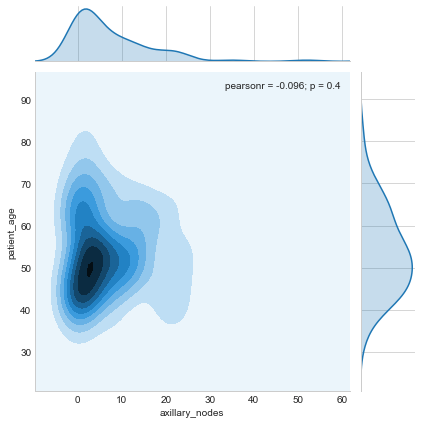

In [37]:
#2D Density plot, contors-plot for patients dead <5 years.
sns.jointplot(x="axillary_nodes", y="patient_age", data=patient_dead, kind="kde");
plt.show();

**Observation:**
* Patients aged between 45-55 and with number of axillary nodes in range 0-5 has maximum density

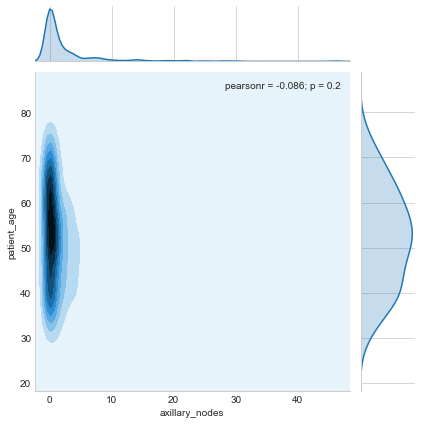

In [38]:
#2D Density plot, contors-plot for patients dead >5 years.
sns.jointplot(x="axillary_nodes", y="patient_age", data=patient_survived, kind="kde");
plt.show();

**Observation:**
* Patients aged between 45-65 and with number of axillary nodes in range -2 to 2 has maximum density.

## Conclusion:


* Patients who are aged below 65 with axillary nodes  nearer to zero are most likely to suvive more the 5 years.
* Whereas patients above the age of 78 have zero chances of survival more the 5 years.